In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("data/PlayersFBREF.csv")

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()


Dataset loaded successfully!
Shape: (2274, 34)


,Unnamed: 0,Player,Nation,Position,Age,Matches Played,Starts,Minutes,90s Played,Goals,...,Goals Per 90,Assists Per 90,Goals + Assists Per 90,Non-Penalty Goals Per 90,Non-Penalty Goals + Assists Per 90,xG Per 90,xAG Per 90,xG + xAG Per 90,npxG Per 90,npxG + xAG Per 90
0,0,Mohamed Salah,EGY,AT,32,38,38,"3,371",37.5,29,...,0.77,0.48,1.25,0.53,1.01,0.67,0.38,1.05,0.49,0.87
1,1,Virgil van Dijk,NED,DF,33,37,37,"3,330",37.0,3,...,0.08,0.03,0.11,0.08,0.11,0.06,0.02,0.08,0.06,0.08
2,2,Ryan Gravenberch,NED,MT,22,37,37,"3,160",35.1,0,...,0.00,0.11,0.11,0.00,0.11,0.03,0.09,0.12,0.03,0.12
3,3,Alexis Mac Allister,ARG,MT,25,35,30,"2,599",28.9,5,...,0.17,0.17,0.35,0.17,0.35,0.10,0.16,0.26,0.10,0.26
4,4,Ibrahima Konaté,FRA,DF,25,31,30,"2,560",28.4,1,...,0.04,0.07,0.11,0.04,0.11,0.06,0.03,0.10,0.06,0.10


In [2]:
# Dataset overview
print("Dataset shape:", df.shape)
print("\nDataset info:")
df.info()
print("\nColumn names:")
print(df.columns.tolist())

Dataset shape: (2274, 34)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          2274 non-null   int64  
 1   Player                              2274 non-null   object 
 2   Nation                              2274 non-null   object 
 3   Position                            2274 non-null   object 
 4   Age                                 2274 non-null   int64  
 5   Matches Played                      2274 non-null   int64  
 6   Starts                              2274 non-null   int64  
 7   Minutes                             2274 non-null   object 
 8   90s Played                          2274 non-null   float64
 9   Goals                               2274 non-null   int64  
 10  Assists                             2274 non-null   int64  
 11  Go

In [3]:
df.describe()

,Unnamed: 0,Age,Matches Played,Starts,90s Played,Goals,Assists,Goals + Assists,Non-Penalty Goals,Penalty Goals Made,...,Goals Per 90,Assists Per 90,Goals + Assists Per 90,Non-Penalty Goals Per 90,Non-Penalty Goals + Assists Per 90,xG Per 90,xAG Per 90,xG + xAG Per 90,npxG Per 90,npxG + xAG Per 90
count,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,...,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000
mean,1136.500000,25.094987,19.226913,14.313105,14.202331,1.566403,1.096746,2.663149,1.434037,0.132366,...,0.096486,0.063602,0.160048,0.089943,0.153514,0.115391,0.075853,0.191042,0.108672,0.184415
std,656.591578,4.465810,11.519163,11.512175,10.968616,3.124944,1.880588,4.497444,2.767307,0.658344,...,0.182532,0.104213,0.234581,0.173435,0.224508,0.185577,0.112750,0.236506,0.177073,0.227744
min,0.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,568.250000,22.000000,9.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.040000,0.010000,0.040000
50%,1136.500000,25.000000,20.000000,12.000000,12.300000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.060000,0.000000,0.060000,0.050000,0.040000,0.120000,0.050000,0.110000
75%,1704.750000,28.000000,30.000000,25.000000,23.900000,2.000000,1.000000,3.000000,2.000000,0.000000,...,0.120000,0.100000,0.240000,0.110000,0.230000,0.140000,0.110000,0.280000,0.140000,0.260000
max,2273.000000,41.000000,38.000000,38.000000,38.000000,29.000000,18.000000,47.000000,24.000000,9.000000,...,2.430000,1.010000,2.430000,2.430000,2.430000,3.530000,2.470000,3.530000,3.530000,3.530000


In [4]:
# 1) Choose the regression target: goals per 90 minutes
target_col = 'Goals Per 90'

# 2) Choose input features (no player name, no nation, etc.)
feature_cols = [
    'Age',
    '90s Played',
    'xG Per 90',
    'xAG Per 90',
    'xG + xAG Per 90',
    'npxG Per 90',
    'npxG + xAG Per 90',
    'Progressive Carries',
    'Progressive Passes',
    'Progressive Receives'
]

# 3) Build feature matrix X and target vector y
X = df[feature_cols]
y = df[target_col]

X.head(), y.head()

(   Age  90s Played  xG Per 90  xAG Per 90  xG + xAG Per 90  npxG Per 90  \
 0   32        37.5       0.67        0.38             1.05         0.49   
 1   33        37.0       0.06        0.02             0.08         0.06   
 2   22        35.1       0.03        0.09             0.12         0.03   
 3   25        28.9       0.10        0.16             0.26         0.10   
 4   25        28.4       0.06        0.03             0.10         0.06   
 
    npxG + xAG Per 90  Progressive Carries  Progressive Passes  \
 0               0.87                  154                 144   
 1               0.08                   22                 198   
 2               0.12                   70                 181   
 3               0.26                   36                 177   
 4               0.10                   25                 115   
 
    Progressive Receives  
 0                   488  
 1                     6  
 2                    55  
 3                    80  
 4       

In [5]:
X.isna().sum(), y.isna().sum()

(Age                     0
 90s Played              0
 xG Per 90               0
 xAG Per 90              0
 xG + xAG Per 90         0
 npxG Per 90             0
 npxG + xAG Per 90       0
 Progressive Carries     0
 Progressive Passes      0
 Progressive Receives    0
 dtype: int64,
 np.int64(0))

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (1819, 10)
Test set: (455, 10)


In [7]:
# Scale features for Linear Regression (Random Forest doesn't need scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features scaled successfully!")

Features scaled successfully!


In [8]:
print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Training set shape: (1819, 10)
Test set shape: (455, 10)


In [9]:
# Train Linear Regression model
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test_scaled)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

Linear Regression Results:
MAE: 0.07425062613076365
RMSE: 0.17489089296916596
R²: 0.3676856993234504


In [10]:
# Linear Regression coefficients
coef_df = pd.DataFrame({
    'feature': feature_cols,
    'coefficient': reg.coef_
}).sort_values(by='coefficient', ascending=False)

coef_df

,feature,coefficient
6,npxG + xAG Per 90,0.450027
2,xG Per 90,0.371954
9,Progressive Receives,0.066476
1,90s Played,0.008792
0,Age,0.000621
8,Progressive Passes,-0.004720
7,Progressive Carries,-0.028700
3,xAG Per 90,-0.133733
4,xG + xAG Per 90,-0.187060
5,npxG Per 90,-0.480194


In [11]:
# Train Random Forest model
# Note: Random Forest doesn't need feature scaling
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R²:", r2_rf)

Random Forest Results:
MAE: 0.0680787960622808
RMSE: 0.18551122393346806
R²: 0.28855882729596827


In [12]:
# Model 3: XGBoost Regressor
# Install if needed: pip install xgboost
try:
    from xgboost import XGBRegressor
    
    # Create and train XGBoost
    xgb = XGBRegressor(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1
    )
    
    xgb.fit(X_train, y_train)  # XGBoost doesn't need scaling
    
    # Make predictions
    y_pred_xgb = xgb.predict(X_test)
    
    # Evaluate performance
    mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
    rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    r2_xgb = r2_score(y_test, y_pred_xgb)
    
    print("XGBoost Results:")
    print("MAE:", mae_xgb)
    print("RMSE:", rmse_xgb)
    print("R²:", r2_xgb)
    
except ImportError:
    print("XGBoost not installed. Install with: pip install xgboost")
    print("Falling back to GradientBoostingRegressor (built into sklearn)")
    from sklearn.ensemble import GradientBoostingRegressor
    
    xgb = GradientBoostingRegressor(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        random_state=42
    )
    
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)
    
    mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
    rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    r2_xgb = r2_score(y_test, y_pred_xgb)
    
    print("Gradient Boosting Results:")
    print("MAE:", mae_xgb)
    print("RMSE:", rmse_xgb)
    print("R²:", r2_xgb)


XGBoost Results:
MAE: 0.07099030513343835
RMSE: 0.19037864569110013
R²: 0.250735632079794


In [13]:
# Model 4: Elastic Net (handles multicollinearity)
from sklearn.linear_model import ElasticNet

# Create and train Elastic Net
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic.fit(X_train_scaled, y_train)  # Use scaled features

# Make predictions
y_pred_elastic = elastic.predict(X_test_scaled)

# Evaluate performance
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
r2_elastic = r2_score(y_test, y_pred_elastic)

print("Elastic Net Results:")
print("MAE:", mae_elastic)
print("RMSE:", rmse_elastic)
print("R²:", r2_elastic)


Elastic Net Results:
MAE: 0.1227679621093585
RMSE: 0.22028990561215162
R²: -0.0032006557835397853


In [14]:
# Update comparison table with all 4 models
# Handle cases where XGBoost/Elastic Net might not be trained yet
try:
    mae_xgb
    rmse_xgb
    r2_xgb
    xgb_exists = True
except NameError:
    xgb_exists = False
    mae_xgb = rmse_xgb = r2_xgb = None

try:
    mae_elastic
    rmse_elastic
    r2_elastic
    elastic_exists = True
except NameError:
    elastic_exists = False
    mae_elastic = rmse_elastic = r2_elastic = None

# Build comparison table with available models
models = ['Linear Regression', 'Random Forest']
mae_list = [mae, mae_rf]
rmse_list = [rmse, rmse_rf]
r2_list = [r2, r2_rf]

if xgb_exists:
    models.append('XGBoost')
    mae_list.append(mae_xgb)
    rmse_list.append(rmse_xgb)
    r2_list.append(r2_xgb)

if elastic_exists:
    models.append('Elastic Net')
    mae_list.append(mae_elastic)
    rmse_list.append(rmse_elastic)
    r2_list.append(r2_elastic)

comparison = pd.DataFrame({
    'Model': models,
    'MAE': mae_list,
    'RMSE': rmse_list,
    'R²': r2_list
})

comparison = comparison.sort_values(by='R²', ascending=False)
print("\n" + "=" * 60)
print("MODEL COMPARISON (sorted by R²)")
print("=" * 60)
print(comparison.to_string(index=False))
print("=" * 60)
comparison


MODEL COMPARISON (sorted by R²)
            Model      MAE     RMSE        R²
Linear Regression 0.074251 0.174891  0.367686
    Random Forest 0.068079 0.185511  0.288559
          XGBoost 0.070990 0.190379  0.250736
      Elastic Net 0.122768 0.220290 -0.003201


,Model,MAE,RMSE,R²
0,Linear Regression,0.074251,0.174891,0.367686
1,Random Forest,0.068079,0.185511,0.288559
2,XGBoost,0.070990,0.190379,0.250736
3,Elastic Net,0.122768,0.220290,-0.003201


In [15]:
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importance

,feature,importance
2,xG Per 90,0.607692
1,90s Played,0.108027
9,Progressive Receives,0.064503
7,Progressive Carries,0.037448
8,Progressive Passes,0.036958
5,npxG Per 90,0.036791
4,xG + xAG Per 90,0.033770
3,xAG Per 90,0.031201
0,Age,0.022871
6,npxG + xAG Per 90,0.020741


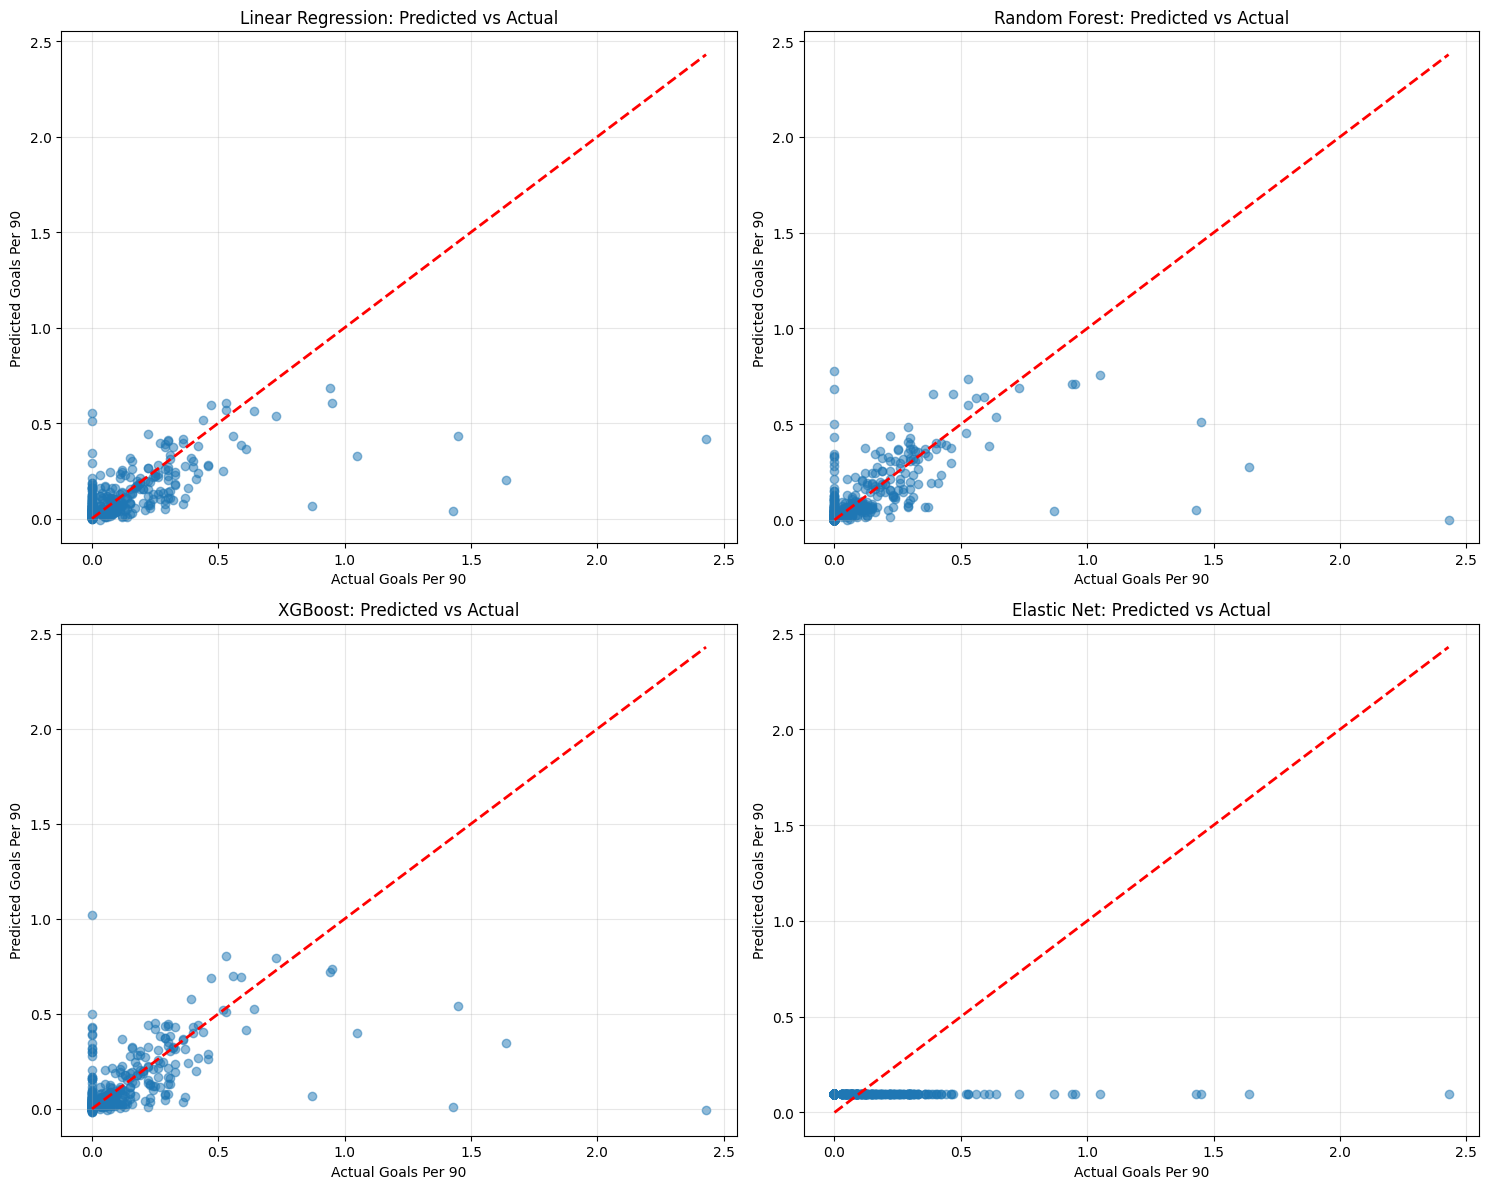

In [16]:
# Visualize predictions: Predicted vs Actual (all 4 models)
# Check which models are available
try:
    y_pred_xgb
    xgb_exists = True
except NameError:
    xgb_exists = False

try:
    y_pred_elastic
    elastic_exists = True
except NameError:
    elastic_exists = False

# Create subplots based on available models
if xgb_exists and elastic_exists:
    # All 4 models: 2x2 grid
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Linear Regression
    axes[0, 0].scatter(y_test, y_pred, alpha=0.5)
    axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0, 0].set_xlabel('Actual Goals Per 90')
    axes[0, 0].set_ylabel('Predicted Goals Per 90')
    axes[0, 0].set_title('Linear Regression: Predicted vs Actual')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Random Forest
    axes[0, 1].scatter(y_test, y_pred_rf, alpha=0.5)
    axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0, 1].set_xlabel('Actual Goals Per 90')
    axes[0, 1].set_ylabel('Predicted Goals Per 90')
    axes[0, 1].set_title('Random Forest: Predicted vs Actual')
    axes[0, 1].grid(True, alpha=0.3)
    
    # XGBoost
    axes[1, 0].scatter(y_test, y_pred_xgb, alpha=0.5)
    axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[1, 0].set_xlabel('Actual Goals Per 90')
    axes[1, 0].set_ylabel('Predicted Goals Per 90')
    axes[1, 0].set_title('XGBoost: Predicted vs Actual')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Elastic Net
    axes[1, 1].scatter(y_test, y_pred_elastic, alpha=0.5)
    axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[1, 1].set_xlabel('Actual Goals Per 90')
    axes[1, 1].set_ylabel('Predicted Goals Per 90')
    axes[1, 1].set_title('Elastic Net: Predicted vs Actual')
    axes[1, 1].grid(True, alpha=0.3)
    
elif xgb_exists or elastic_exists:
    # 3 models: 2x2 grid with one empty
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    # Linear Regression
    axes[0].scatter(y_test, y_pred, alpha=0.5)
    axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0].set_xlabel('Actual Goals Per 90')
    axes[0].set_ylabel('Predicted Goals Per 90')
    axes[0].set_title('Linear Regression: Predicted vs Actual')
    axes[0].grid(True, alpha=0.3)
    
    # Random Forest
    axes[1].scatter(y_test, y_pred_rf, alpha=0.5)
    axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[1].set_xlabel('Actual Goals Per 90')
    axes[1].set_ylabel('Predicted Goals Per 90')
    axes[1].set_title('Random Forest: Predicted vs Actual')
    axes[1].grid(True, alpha=0.3)
    
    # Third model
    if xgb_exists:
        axes[2].scatter(y_test, y_pred_xgb, alpha=0.5)
        axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        axes[2].set_xlabel('Actual Goals Per 90')
        axes[2].set_ylabel('Predicted Goals Per 90')
        axes[2].set_title('XGBoost: Predicted vs Actual')
        axes[2].grid(True, alpha=0.3)
    else:
        axes[2].scatter(y_test, y_pred_elastic, alpha=0.5)
        axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        axes[2].set_xlabel('Actual Goals Per 90')
        axes[2].set_ylabel('Predicted Goals Per 90')
        axes[2].set_title('Elastic Net: Predicted vs Actual')
        axes[2].grid(True, alpha=0.3)
    
    # Hide the 4th subplot
    axes[3].axis('off')
    
else:
    # Only 2 models: original layout
    plt.figure(figsize=(12, 5))
    
    # Linear Regression predictions
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Goals Per 90')
    plt.ylabel('Predicted Goals Per 90')
    plt.title('Linear Regression: Predicted vs Actual')
    plt.grid(True, alpha=0.3)
    
    # Random Forest predictions
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred_rf, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Goals Per 90')
    plt.ylabel('Predicted Goals Per 90')
    plt.title('Random Forest: Predicted vs Actual')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

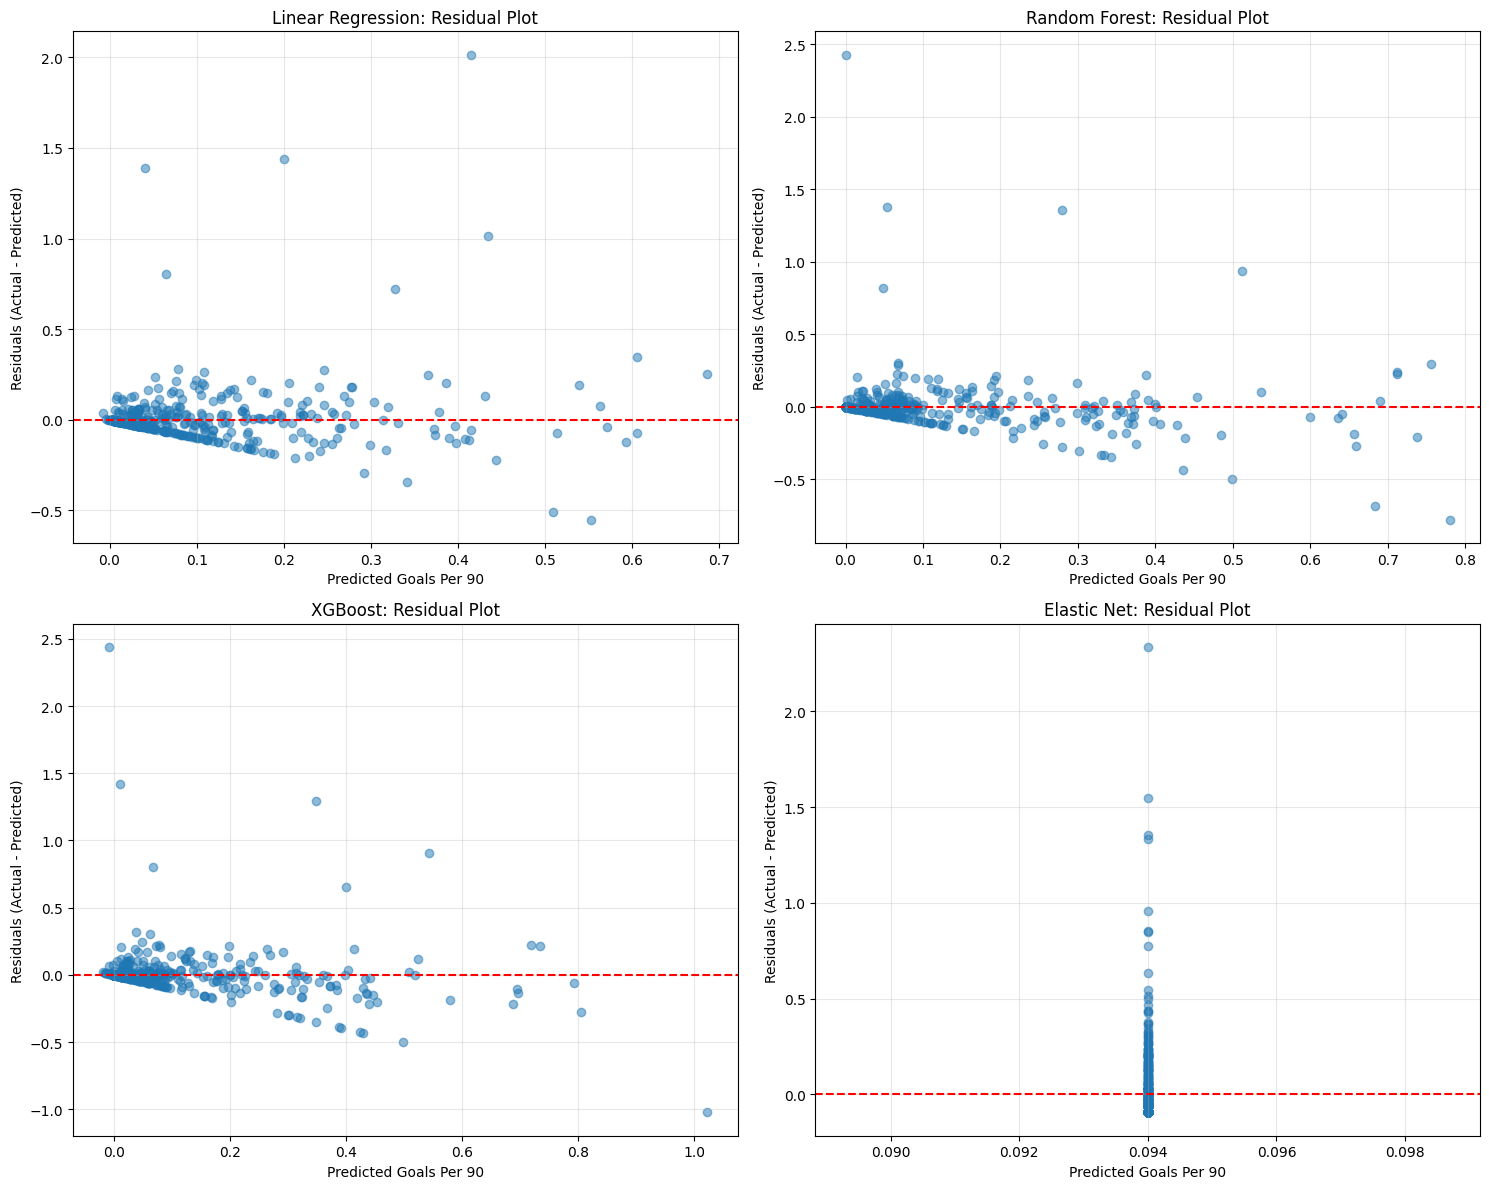

In [17]:
# Residual plots for all 4 models
# Check which models are available
try:
    y_pred_xgb
    xgb_exists = True
except NameError:
    xgb_exists = False

try:
    y_pred_elastic
    elastic_exists = True
except NameError:
    elastic_exists = False

# Create subplots based on available models
if xgb_exists and elastic_exists:
    # All 4 models: 2x2 grid
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Linear Regression residuals
    residuals_lr = y_test - y_pred
    axes[0, 0].scatter(y_pred, residuals_lr, alpha=0.5)
    axes[0, 0].axhline(y=0, color='r', linestyle='--')
    axes[0, 0].set_xlabel('Predicted Goals Per 90')
    axes[0, 0].set_ylabel('Residuals (Actual - Predicted)')
    axes[0, 0].set_title('Linear Regression: Residual Plot')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Random Forest residuals
    residuals_rf = y_test - y_pred_rf
    axes[0, 1].scatter(y_pred_rf, residuals_rf, alpha=0.5)
    axes[0, 1].axhline(y=0, color='r', linestyle='--')
    axes[0, 1].set_xlabel('Predicted Goals Per 90')
    axes[0, 1].set_ylabel('Residuals (Actual - Predicted)')
    axes[0, 1].set_title('Random Forest: Residual Plot')
    axes[0, 1].grid(True, alpha=0.3)
    
    # XGBoost residuals
    residuals_xgb = y_test - y_pred_xgb
    axes[1, 0].scatter(y_pred_xgb, residuals_xgb, alpha=0.5)
    axes[1, 0].axhline(y=0, color='r', linestyle='--')
    axes[1, 0].set_xlabel('Predicted Goals Per 90')
    axes[1, 0].set_ylabel('Residuals (Actual - Predicted)')
    axes[1, 0].set_title('XGBoost: Residual Plot')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Elastic Net residuals
    residuals_elastic = y_test - y_pred_elastic
    axes[1, 1].scatter(y_pred_elastic, residuals_elastic, alpha=0.5)
    axes[1, 1].axhline(y=0, color='r', linestyle='--')
    axes[1, 1].set_xlabel('Predicted Goals Per 90')
    axes[1, 1].set_ylabel('Residuals (Actual - Predicted)')
    axes[1, 1].set_title('Elastic Net: Residual Plot')
    axes[1, 1].grid(True, alpha=0.3)
    
elif xgb_exists or elastic_exists:
    # 3 models: 2x2 grid with one empty
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    # Linear Regression residuals
    residuals_lr = y_test - y_pred
    axes[0].scatter(y_pred, residuals_lr, alpha=0.5)
    axes[0].axhline(y=0, color='r', linestyle='--')
    axes[0].set_xlabel('Predicted Goals Per 90')
    axes[0].set_ylabel('Residuals (Actual - Predicted)')
    axes[0].set_title('Linear Regression: Residual Plot')
    axes[0].grid(True, alpha=0.3)
    
    # Random Forest residuals
    residuals_rf = y_test - y_pred_rf
    axes[1].scatter(y_pred_rf, residuals_rf, alpha=0.5)
    axes[1].axhline(y=0, color='r', linestyle='--')
    axes[1].set_xlabel('Predicted Goals Per 90')
    axes[1].set_ylabel('Residuals (Actual - Predicted)')
    axes[1].set_title('Random Forest: Residual Plot')
    axes[1].grid(True, alpha=0.3)
    
    # Third model
    if xgb_exists:
        residuals_xgb = y_test - y_pred_xgb
        axes[2].scatter(y_pred_xgb, residuals_xgb, alpha=0.5)
        axes[2].axhline(y=0, color='r', linestyle='--')
        axes[2].set_xlabel('Predicted Goals Per 90')
        axes[2].set_ylabel('Residuals (Actual - Predicted)')
        axes[2].set_title('XGBoost: Residual Plot')
        axes[2].grid(True, alpha=0.3)
    else:
        residuals_elastic = y_test - y_pred_elastic
        axes[2].scatter(y_pred_elastic, residuals_elastic, alpha=0.5)
        axes[2].axhline(y=0, color='r', linestyle='--')
        axes[2].set_xlabel('Predicted Goals Per 90')
        axes[2].set_ylabel('Residuals (Actual - Predicted)')
        axes[2].set_title('Elastic Net: Residual Plot')
        axes[2].grid(True, alpha=0.3)
    
    # Hide the 4th subplot
    axes[3].axis('off')
    
else:
    # Only 2 models: original layout
    plt.figure(figsize=(12, 5))
    
    # Linear Regression residuals
    residuals_lr = y_test - y_pred
    plt.subplot(1, 2, 1)
    plt.scatter(y_pred, residuals_lr, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Goals Per 90')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.title('Linear Regression: Residual Plot')
    plt.grid(True, alpha=0.3)
    
    # Random Forest residuals
    residuals_rf = y_test - y_pred_rf
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred_rf, residuals_rf, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Goals Per 90')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.title('Random Forest: Residual Plot')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

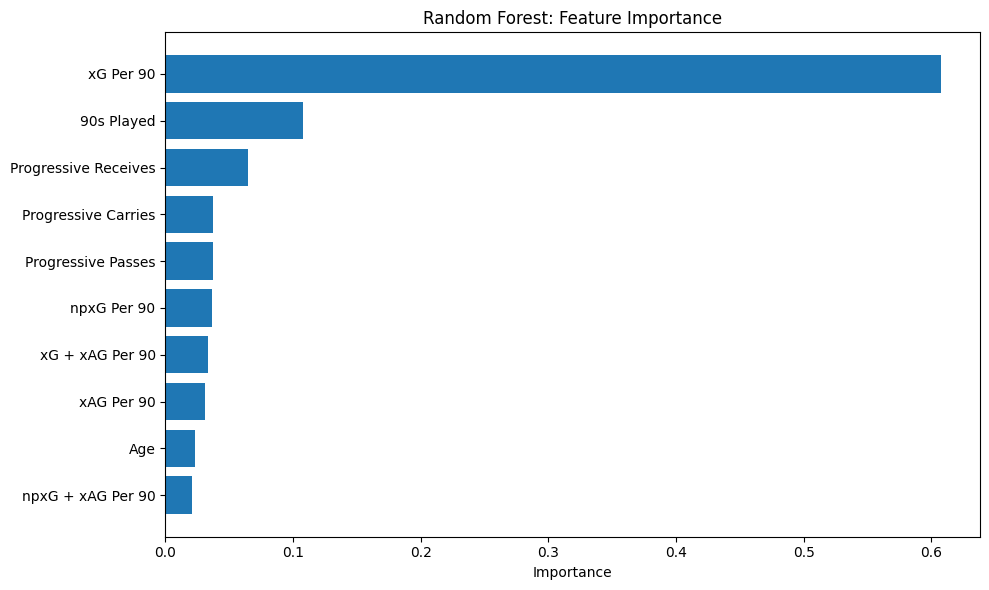

In [18]:
plt.figure(figsize=(10, 6))

# Get feature importance from Random Forest
rf_importance = feature_importance.sort_values(by='importance', ascending=True)

plt.barh(rf_importance['feature'], rf_importance['importance'])
plt.xlabel('Importance')
plt.title('Random Forest: Feature Importance')
plt.tight_layout()
plt.show()

In [19]:
# Create a results dataframe and save to CSV
# Calculate residuals if they don't exist (in case cells were run out of order)
try:
    residuals_lr
except NameError:
    residuals_lr = y_test - y_pred

try:
    residuals_rf
except NameError:
    residuals_rf = y_test - y_pred_rf

# Check if required variables exist
required_vars = ['y_test', 'y_pred', 'y_pred_rf']
missing_vars = [var for var in required_vars if var not in globals()]
if missing_vars:
    raise NameError(f"Missing required variables. Please run cells 5, 8, and 10 first. Missing: {missing_vars}")

results_df = pd.DataFrame({
    'Actual_Goals_Per_90': y_test.values,
    'Predicted_LR': y_pred,
    'Predicted_RF': y_pred_rf,
    'Error_LR': residuals_lr,
    'Error_RF': residuals_rf
})

results_df.to_csv('data/predictions_results.csv', index=False)
print("Predictions saved to data/predictions_results.csv")
print(f"Results shape: {results_df.shape}")

Predictions saved to data/predictions_results.csv
Results shape: (455, 5)


In [20]:
# Function to predict Goals Per 90 for a specific player
def predict_player_goals(player_name, df, reg, rf, scaler, feature_cols, xgb=None, elastic=None):
    """
    Predict Goals Per 90 for a specific player using all available models
    
    Parameters:
    - player_name: Name of the player (string)
    - df: Original dataframe with all player data
    - reg: Trained Linear Regression model
    - rf: Trained Random Forest model
    - scaler: Fitted StandardScaler
    - feature_cols: List of feature column names
    - xgb: Trained XGBoost model (optional)
    - elastic: Trained Elastic Net model (optional)
    """
    # Search for player (case-insensitive, partial match)
    player_data = df[df['Player'].str.contains(player_name, case=False, na=False)]
    
    if player_data.empty:
        print(f"❌ Player '{player_name}' not found in the dataset.")
        print("\nAvailable players (first 10):")
        print(df['Player'].head(10).tolist())
        return None
    
    if len(player_data) > 1:
        print(f"⚠️  Multiple players found matching '{player_name}':")
        print(player_data[['Player', 'Nation', 'Position', 'Goals Per 90']].to_string())
        print("\nPlease use a more specific name.")
        return None
    
    # Extract player info
    player_row = player_data.iloc[0]
    player_features = player_data[feature_cols].iloc[0:1]  # Keep as DataFrame with one row
    actual_goals = player_row['Goals Per 90']
    
    # Prepare features for prediction
    # For Linear Regression and Elastic Net: need to scale (use DataFrame to preserve feature names)
    player_features_scaled = scaler.transform(player_features)
    
    # For Random Forest and XGBoost: no scaling needed (use DataFrame to preserve feature names)
    player_features_array = player_features
    
    # Make predictions
    pred_lr = reg.predict(player_features_scaled)[0]
    pred_rf = rf.predict(player_features_array)[0]
    
    # Optional models
    pred_xgb = None
    pred_elastic = None
    if xgb is not None:
        pred_xgb = xgb.predict(player_features_array)[0]
    if elastic is not None:
        pred_elastic = elastic.predict(player_features_scaled)[0]
    
    # Display results
    print("=" * 60)
    print(f"📊 PREDICTION RESULTS FOR: {player_row['Player']}")
    print("=" * 60)
    print(f"Position: {player_row['Position']}")
    print(f"Nation: {player_row['Nation']}")
    print(f"Age: {player_row['Age']}")
    print(f"90s Played: {player_row['90s Played']:.2f}")
    print("\n" + "-" * 60)
    print("ACTUAL Goals Per 90:".ljust(30) + f"{actual_goals:.4f}")
    print("-" * 60)
    print("PREDICTIONS:")
    print(f"  Linear Regression:".ljust(30) + f"{pred_lr:.4f}")
    print(f"  Random Forest:".ljust(30) + f"{pred_rf:.4f}")
    if pred_xgb is not None:
        print(f"  XGBoost:".ljust(30) + f"{pred_xgb:.4f}")
    if pred_elastic is not None:
        print(f"  Elastic Net:".ljust(30) + f"{pred_elastic:.4f}")
    print("-" * 60)
    print("ERRORS:")
    print(f"  Linear Regression Error:".ljust(30) + f"{abs(actual_goals - pred_lr):.4f}")
    print(f"  Random Forest Error:".ljust(30) + f"{abs(actual_goals - pred_rf):.4f}")
    if pred_xgb is not None:
        print(f"  XGBoost Error:".ljust(30) + f"{abs(actual_goals - pred_xgb):.4f}")
    if pred_elastic is not None:
        print(f"  Elastic Net Error:".ljust(30) + f"{abs(actual_goals - pred_elastic):.4f}")
    print("=" * 60)
    
    # Show key features
    print("\n📈 KEY FEATURES:")
    print(f"  xG Per 90: {player_row['xG Per 90']:.4f}")
    print(f"  xAG Per 90: {player_row['xAG Per 90']:.4f}")
    print(f"  Progressive Receives: {player_row['Progressive Receives']}")
    print("=" * 60)
    
    # Build return dictionary
    result = {
        'player': player_row['Player'],
        'actual': actual_goals,
        'predicted_lr': pred_lr,
        'predicted_rf': pred_rf,
        'error_lr': abs(actual_goals - pred_lr),
        'error_rf': abs(actual_goals - pred_rf)
    }
    
    if pred_xgb is not None:
        result['predicted_xgb'] = pred_xgb
        result['error_xgb'] = abs(actual_goals - pred_xgb)
    if pred_elastic is not None:
        result['predicted_elastic'] = pred_elastic
        result['error_elastic'] = abs(actual_goals - pred_elastic)
    
    return result


In [21]:
# List available players (first 20)
print("Sample of available players in dataset:")
print(df['Player'].head(20).tolist())
print(f"\nTotal players in dataset: {len(df)}")


Sample of available players in dataset:
['Mohamed Salah', 'Virgil van Dijk', 'Ryan Gravenberch', 'Alexis Mac Allister', 'Ibrahima Konaté', 'Dominik Szoboszlai', 'Andrew Robertson', 'Alisson', 'Luis Díaz', 'Trent Alexander-Arnold', 'Cody Gakpo', 'Curtis Jones', 'Diogo Jota', 'Caoimhín Kelleher', 'Kostas Tsimikas', 'Darwin Núñez', 'Conor Bradley', 'Joe Gomez', 'Jarell Quansah', 'Harvey Elliott']

Total players in dataset: 2274


In [22]:
# Search for players by name (example)
search_term = "Messi"
matching_players = df[df['Player'].str.contains(search_term, case=False, na=False)]
if not matching_players.empty:
    print(f"Players matching '{search_term}':")
    print(matching_players[['Player', 'Nation', 'Position', 'Goals Per 90']].to_string(index=False))
else:
    print(f"No players found matching '{search_term}'")


Players matching 'Messi':
        Player Nation Position  Goals Per 90
Junior Messias    BRA    MT,AT          0.11


In [23]:
# Example: Test a specific player
# Replace "Messi" with any player name from your dataset
# Make sure Cell 19 (function definition) has been run first!

try:
    # Check if XGBoost and Elastic Net models are available
    try:
        xgb_model = xgb
    except NameError:
        xgb_model = None
    
    try:
        elastic_model = elastic
    except NameError:
        elastic_model = None
    
    result = predict_player_goals("Messi", df, reg, rf, scaler, feature_cols, xgb=xgb_model, elastic=elastic_model)
except NameError as e:
    print("⚠️  Error: Please run Cell 19 first to define the prediction function.")
    print(f"Details: {e}")


📊 PREDICTION RESULTS FOR: Junior Messias
Position: MT,AT
Nation: BRA
Age: 33
90s Played: 9.40

------------------------------------------------------------
ACTUAL Goals Per 90:          0.1100
------------------------------------------------------------
PREDICTIONS:
  Linear Regression:          0.2334
  Random Forest:              0.2051
  XGBoost:                    0.2082
  Elastic Net:                0.0940
------------------------------------------------------------
ERRORS:
  Linear Regression Error:    0.1234
  Random Forest Error:        0.0951
  XGBoost Error:              0.0982
  Elastic Net Error:          0.0160

📈 KEY FEATURES:
  xG Per 90: 0.2500
  xAG Per 90: 0.0700
  Progressive Receives: 49


In [24]:
# Test multiple players at once
# Make sure Cell 19 (function definition) has been run first!

try:
    # Check if XGBoost and Elastic Net models are available
    try:
        xgb_model = xgb
    except NameError:
        xgb_model = None
    
    try:
        elastic_model = elastic
    except NameError:
        elastic_model = None
    
    players_to_test = ["Messi", "Ronaldo", "Mbappé", "Haaland"]
    
    results_list = []
    for player_name in players_to_test:
        print(f"\n{'='*60}")
        print(f"Testing: {player_name}")
        print('='*60)
        result = predict_player_goals(player_name, df, reg, rf, scaler, feature_cols, xgb=xgb_model, elastic=elastic_model)
        if result:
            results_list.append(result)
    
    # Create comparison dataframe
    if results_list:
        comparison_df = pd.DataFrame(results_list)
        print("\n" + "=" * 60)
        print("COMPARISON OF MULTIPLE PLAYERS")
        print("=" * 60)
        print(comparison_df.to_string(index=False))
        print("=" * 60)
    else:
        print("\n⚠️  No players were successfully tested.")
        
except NameError as e:
    print("⚠️  Error: Please run Cell 17 first to define the prediction function.")
    print(f"Details: {e}")



Testing: Messi
📊 PREDICTION RESULTS FOR: Junior Messias
Position: MT,AT
Nation: BRA
Age: 33
90s Played: 9.40

------------------------------------------------------------
ACTUAL Goals Per 90:          0.1100
------------------------------------------------------------
PREDICTIONS:
  Linear Regression:          0.2334
  Random Forest:              0.2051
  XGBoost:                    0.2082
  Elastic Net:                0.0940
------------------------------------------------------------
ERRORS:
  Linear Regression Error:    0.1234
  Random Forest Error:        0.0951
  XGBoost Error:              0.0982
  Elastic Net Error:          0.0160

📈 KEY FEATURES:
  xG Per 90: 0.2500
  xAG Per 90: 0.0700
  Progressive Receives: 49

Testing: Ronaldo
❌ Player 'Ronaldo' not found in the dataset.

Available players (first 10):
['Mohamed Salah', 'Virgil van Dijk', 'Ryan Gravenberch', 'Alexis Mac Allister', 'Ibrahima Konaté', 'Dominik Szoboszlai', 'Andrew Robertson', 'Alisson', 'Luis Díaz', 'Trent A

In [25]:
# Helper function to show feature statistics (to help with reasonable inputs)
def show_feature_statistics(df, feature_cols):
    """
    Display statistics for features to help users understand reasonable input ranges
    """
    print("=" * 60)
    print("FEATURE STATISTICS (to guide your inputs)")
    print("=" * 60)
    stats_df = df[feature_cols].describe()
    print(stats_df.round(2))
    print("\n💡 Use these statistics as a reference for reasonable input values")
    print("=" * 60)


In [26]:
# Function to predict Goals Per 90 for a custom player (not in dataset)
def predict_custom_player(player_name, age, ninties_played, xg_per_90, xag_per_90, 
                          xg_plus_xag_per_90, npxg_per_90, npxg_plus_xag_per_90,
                          progressive_carries, progressive_passes, progressive_receives,
                          reg, rf, scaler, feature_cols, xgb=None, elastic=None):
    """
    Predict Goals Per 90 for a custom player using manual feature inputs
    
    Parameters:
    - player_name: Name of the player (string)
    - age: Player's age (int)
    - ninties_played: Number of 90-minute units played (float)
    - xg_per_90: Expected goals per 90 minutes (float)
    - xag_per_90: Expected assists per 90 minutes (float)
    - xg_plus_xag_per_90: Combined xG + xAG per 90 (float)
    - npxg_per_90: Non-penalty expected goals per 90 (float)
    - npxg_plus_xag_per_90: Combined npxG + xAG per 90 (float)
    - progressive_carries: Total progressive carries (int)
    - progressive_passes: Total progressive passes (int)
    - progressive_receives: Total progressive receives (int)
    - reg: Trained Linear Regression model
    - rf: Trained Random Forest model
    - scaler: Fitted StandardScaler
    - feature_cols: List of feature column names
    - xgb: Trained XGBoost model (optional)
    - elastic: Trained Elastic Net model (optional)
    """
    # Create feature DataFrame in the correct order (preserves feature names)
    player_features = pd.DataFrame([[
        age,
        ninties_played,
        xg_per_90,
        xag_per_90,
        xg_plus_xag_per_90,
        npxg_per_90,
        npxg_plus_xag_per_90,
        progressive_carries,
        progressive_passes,
        progressive_receives
    ]], columns=feature_cols)
    
    # Prepare features for prediction
    # For Linear Regression and Elastic Net: need to scale (DataFrame preserves feature names)
    player_features_scaled = scaler.transform(player_features)
    
    # For Random Forest and XGBoost: no scaling needed (DataFrame preserves feature names)
    player_features_array = player_features
    
    # Make predictions
    pred_lr = reg.predict(player_features_scaled)[0]
    pred_rf = rf.predict(player_features_array)[0]
    
    # Optional models
    pred_xgb = None
    pred_elastic = None
    if xgb is not None:
        pred_xgb = xgb.predict(player_features_array)[0]
    if elastic is not None:
        pred_elastic = elastic.predict(player_features_scaled)[0]
    
    # Display results
    print("=" * 60)
    print(f"📊 PREDICTION RESULTS FOR: {player_name}")
    print("=" * 60)
    print(f"Age: {age}")
    print(f"90s Played: {ninties_played:.2f}")
    print("\n" + "-" * 60)
    print("PREDICTIONS:")
    print(f"  Linear Regression:".ljust(30) + f"{pred_lr:.4f} goals per 90")
    print(f"  Random Forest:".ljust(30) + f"{pred_rf:.4f} goals per 90")
    if pred_xgb is not None:
        print(f"  XGBoost:".ljust(30) + f"{pred_xgb:.4f} goals per 90")
    if pred_elastic is not None:
        print(f"  Elastic Net:".ljust(30) + f"{pred_elastic:.4f} goals per 90")
    print("-" * 60)
    # Calculate average of available models
    predictions = [pred_lr, pred_rf]
    if pred_xgb is not None:
        predictions.append(pred_xgb)
    if pred_elastic is not None:
        predictions.append(pred_elastic)
    print(f"Average Prediction:".ljust(30) + f"{sum(predictions) / len(predictions):.4f} goals per 90")
    print("=" * 60)
    
    # Show input features
    print("\n📈 INPUT FEATURES:")
    print(f"  xG Per 90: {xg_per_90:.4f}")
    print(f"  xAG Per 90: {xag_per_90:.4f}")
    print(f"  npxG Per 90: {npxg_per_90:.4f}")
    print(f"  Progressive Carries: {progressive_carries}")
    print(f"  Progressive Passes: {progressive_passes}")
    print(f"  Progressive Receives: {progressive_receives}")
    print("=" * 60)
    
    # Build return dictionary
    predictions = [pred_lr, pred_rf]
    if pred_xgb is not None:
        predictions.append(pred_xgb)
    if pred_elastic is not None:
        predictions.append(pred_elastic)
    
    result = {
        'player': player_name,
        'predicted_lr': pred_lr,
        'predicted_rf': pred_rf,
        'predicted_avg': sum(predictions) / len(predictions)
    }
    
    if pred_xgb is not None:
        result['predicted_xgb'] = pred_xgb
    if pred_elastic is not None:
        result['predicted_elastic'] = pred_elastic
    
    return result


In [27]:
# Simplified function that takes a dictionary of features
def predict_custom_player_simple(player_name, features_dict, reg, rf, scaler, feature_cols, xgb=None, elastic=None):
    """
    Predict Goals Per 90 for a custom player using a dictionary of features
    
    Parameters:
    - player_name: Name of the player (string)
    - features_dict: Dictionary with feature names as keys
    - reg, rf, scaler, feature_cols: Model components
    - xgb: Trained XGBoost model (optional)
    - elastic: Trained Elastic Net model (optional)
    """
    # Map dictionary to DataFrame in correct order (preserves feature names)
    player_features = pd.DataFrame([[
        features_dict.get('Age', 25),
        features_dict.get('90s Played', 10.0),
        features_dict.get('xG Per 90', 0.3),
        features_dict.get('xAG Per 90', 0.1),
        features_dict.get('xG + xAG Per 90', 0.4),
        features_dict.get('npxG Per 90', 0.25),
        features_dict.get('npxG + xAG Per 90', 0.35),
        features_dict.get('Progressive Carries', 100),
        features_dict.get('Progressive Passes', 70),
        features_dict.get('Progressive Receives', 80)
    ]], columns=feature_cols)
    
    # Make predictions (DataFrame preserves feature names, eliminating warnings)
    # For Linear Regression and Elastic Net: need to scale
    player_features_scaled = scaler.transform(player_features)
    pred_lr = reg.predict(player_features_scaled)[0]
    
    # For Random Forest and XGBoost: no scaling needed
    pred_rf = rf.predict(player_features)[0]
    
    # Optional models
    pred_xgb = None
    pred_elastic = None
    if xgb is not None:
        pred_xgb = xgb.predict(player_features)[0]
    if elastic is not None:
        pred_elastic = elastic.predict(player_features_scaled)[0]
    
    print("=" * 60)
    print(f"📊 PREDICTION FOR: {player_name}")
    print("=" * 60)
    print(f"Linear Regression: {pred_lr:.4f} goals per 90")
    print(f"Random Forest: {pred_rf:.4f} goals per 90")
    if pred_xgb is not None:
        print(f"XGBoost: {pred_xgb:.4f} goals per 90")
    if pred_elastic is not None:
        print(f"Elastic Net: {pred_elastic:.4f} goals per 90")
    
    # Calculate average of available models
    predictions = [pred_lr, pred_rf]
    if pred_xgb is not None:
        predictions.append(pred_xgb)
    if pred_elastic is not None:
        predictions.append(pred_elastic)
    print(f"Average: {sum(predictions) / len(predictions):.4f} goals per 90")
    print("=" * 60)
    
    # Build return dictionary
    result = {'player': player_name, 'predicted_lr': pred_lr, 'predicted_rf': pred_rf}
    if pred_xgb is not None:
        result['predicted_xgb'] = pred_xgb
    if pred_elastic is not None:
        result['predicted_elastic'] = pred_elastic
    result['predicted_avg'] = sum(predictions) / len(predictions)
    
    return result


## Custom Player Prediction Guide

Use the functions above to predict for players **not in the dataset** (e.g., local team players, friends, etc.)

**Quick Reference:**
- **Age**: Player's age in years (typically 16-40)
- **90s Played**: Number of full 90-minute matches played
- **xG Per 90**: Expected goals per 90 minutes (quality of chances)
- **xAG Per 90**: Expected assists per 90 minutes
- **xG + xAG Per 90**: Combined expected goals and assists
- **npxG Per 90**: Non-penalty expected goals per 90
- **npxG + xAG Per 90**: Combined non-penalty xG and xAG
- **Progressive Carries**: Total carries that advance the ball significantly
- **Progressive Passes**: Total passes that advance the ball significantly
- **Progressive Receives**: Total times receiving the ball in advanced positions

**Tip**: If you don't have exact stats, estimate based on position, league level, and playing style.


In [28]:
# Step 1: Check feature statistics to understand reasonable input ranges
# Run this first to see typical values in the dataset
try:
    show_feature_statistics(df, feature_cols)
except NameError as e:
    print("⚠️  Error: Please run cells 0-3 first to load data and define features.")
    print(f"Details: {e}")


FEATURE STATISTICS (to guide your inputs)
           Age  90s Played  xG Per 90  xAG Per 90  xG + xAG Per 90  \
count  2274.00     2274.00    2274.00     2274.00          2274.00   
mean     25.09       14.20       0.12        0.08             0.19   
std       4.47       10.97       0.19        0.11             0.24   
min      15.00        0.00       0.00        0.00             0.00   
25%      22.00        4.00       0.01        0.01             0.04   
50%      25.00       12.30       0.05        0.04             0.12   
75%      28.00       23.90       0.14        0.11             0.28   
max      41.00       38.00       3.53        2.47             3.53   

       npxG Per 90  npxG + xAG Per 90  Progressive Carries  \
count      2274.00            2274.00              2274.00   
mean          0.11               0.18                18.39   
std           0.18               0.23                24.21   
min           0.00               0.00                 0.00   
25%           0.0

In [29]:
# Step 2: Example - Predict for a custom player using detailed function
# Replace these values with your friend's/player's actual statistics

try:
    # Check if XGBoost and Elastic Net models are available
    try:
        xgb_model = xgb
    except NameError:
        xgb_model = None
    
    try:
        elastic_model = elastic
    except NameError:
        elastic_model = None
    
    result = predict_custom_player(
        player_name="Redouane",
        age=25,
        ninties_played=15.0,  # Played 15 full matches (90 minutes each)
        xg_per_90=0.35,  # Expected goals per 90
        xag_per_90=0.15,  # Expected assists per 90
        xg_plus_xag_per_90=0.50,  # xG + xAG per 90
        npxg_per_90=0.30,  # Non-penalty xG per 90
        npxg_plus_xag_per_90=0.45,  # npxG + xAG per 90
        progressive_carries=120,  # Total progressive carries
        progressive_passes=80,  # Total progressive passes
        progressive_receives=95,  # Total progressive receives
        reg=reg,
        rf=rf,
        scaler=scaler,
        feature_cols=feature_cols,
        xgb=xgb_model,
        elastic=elastic_model
    )
except NameError as e:
    print("⚠️  Error: Please run cells 0-17 first to set up models and functions.")
    print(f"Details: {e}")


📊 PREDICTION RESULTS FOR: Redouane
Age: 25
90s Played: 15.00

------------------------------------------------------------
PREDICTIONS:
  Linear Regression:          0.1833 goals per 90
  Random Forest:              0.3841 goals per 90
  XGBoost:                    0.4780 goals per 90
  Elastic Net:                0.0940 goals per 90
------------------------------------------------------------
Average Prediction:           0.2849 goals per 90

📈 INPUT FEATURES:
  xG Per 90: 0.3500
  xAG Per 90: 0.1500
  npxG Per 90: 0.3000
  Progressive Carries: 120
  Progressive Passes: 80
  Progressive Receives: 95


In [30]:
# Step 3: Alternative - Predict using dictionary (simpler method)
# This is easier if you have the stats in a dictionary format

try:
    # Example: Your friend's statistics
    my_friend_stats = {
        'Age': 24,
        '90s Played': 12.5,
        'xG Per 90': 0.28,
        'xAG Per 90': 0.12,
        'xG + xAG Per 90': 0.40,
        'npxG Per 90': 0.25,
        'npxG + xAG Per 90': 0.37,
        'Progressive Carries': 95,
        'Progressive Passes': 65,
        'Progressive Receives': 75
    }
    
    # Check if XGBoost and Elastic Net models are available
    try:
        xgb_model = xgb
    except NameError:
        xgb_model = None
    
    try:
        elastic_model = elastic
    except NameError:
        elastic_model = None
    
    result = predict_custom_player_simple(
        "My Friend", 
        my_friend_stats, 
        reg, rf, scaler, feature_cols,
        xgb=xgb_model,
        elastic=elastic_model
    )
except NameError as e:
    print("⚠️  Error: Please run cells 0-24 first to set up models and functions.")
    print(f"Details: {e}")


📊 PREDICTION FOR: My Friend
Linear Regression: 0.1401 goals per 90
Random Forest: 0.2775 goals per 90
XGBoost: 0.2838 goals per 90
Elastic Net: 0.0940 goals per 90
Average: 0.1989 goals per 90


In [31]:
# Quick reference: What do these features mean?
print("""
FEATURE GUIDE:
==============
- Age: Player's age in years
- 90s Played: Number of full 90-minute matches played
- xG Per 90: Expected goals per 90 minutes (quality of chances)
- xAG Per 90: Expected assists per 90 minutes
- xG + xAG Per 90: Combined expected goals and assists
- npxG Per 90: Non-penalty expected goals per 90
- npxG + xAG Per 90: Combined non-penalty xG and xAG
- Progressive Carries: Total carries that advance the ball significantly
- Progressive Passes: Total passes that advance the ball significantly
- Progressive Receives: Total times receiving the ball in advanced positions

TYPICAL RANGES (from dataset):
- Age: 16-40
- 90s Played: 1-40
- xG Per 90: 0.0-1.5
- Goals Per 90 (predicted): 0.0-1.2

ESTIMATION TIPS:
- If you only have basic stats (goals, assists, matches):
  * xG Per 90 ≈ Goals Per 90 × 0.8-1.2 (depends on finishing quality)
  * xAG Per 90 ≈ Assists Per 90 × 0.8-1.2
  * Progressive actions depend on position and playing style
- For local/amateur players, values are typically lower than professional players
""")



FEATURE GUIDE:
- Age: Player's age in years
- 90s Played: Number of full 90-minute matches played
- xG Per 90: Expected goals per 90 minutes (quality of chances)
- xAG Per 90: Expected assists per 90 minutes
- xG + xAG Per 90: Combined expected goals and assists
- npxG Per 90: Non-penalty expected goals per 90
- npxG + xAG Per 90: Combined non-penalty xG and xAG
- Progressive Carries: Total carries that advance the ball significantly
- Progressive Passes: Total passes that advance the ball significantly
- Progressive Receives: Total times receiving the ball in advanced positions

TYPICAL RANGES (from dataset):
- Age: 16-40
- 90s Played: 1-40
- xG Per 90: 0.0-1.5
- Goals Per 90 (predicted): 0.0-1.2

ESTIMATION TIPS:
- If you only have basic stats (goals, assists, matches):
  * xG Per 90 ≈ Goals Per 90 × 0.8-1.2 (depends on finishing quality)
  * xAG Per 90 ≈ Assists Per 90 × 0.8-1.2
  * Progressive actions depend on position and playing style
- For local/amateur players, values are typ